In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinic_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_df
#mouse_df.merge(clinic_df,how='outer')
# Display the data table for preview
mouse_df = mouse_df.drop(0)
mouse_df = mouse_df.rename(index=str,columns={"Column1":"Mouse ID","Column2":"Drug"})
data_df = clinic_df.merge(mouse_df,how='outer')
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
tumor_vol_df = data_df.groupby(['Drug','Timepoint'])
tumor_vol_df = tumor_vol_df.mean()
tumor_vol_df.head()
tumor_vol_df = pd.DataFrame(data=tumor_vol_df)
tumor_vol_df.head()
tumor_vol_df = tumor_vol_df.drop(labels = "Metastatic Sites", axis = 1)
tumor_vol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
se_df = data_df.groupby(['Drug','Timepoint'])
se_df = se_df.std()
se_df = se_df.drop(labels = "Metastatic Sites", axis = 1)
se_df.head()
se_series = pd.pivot_table(se_df, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
se_series
plac_se = se_series["Placebo"]
cap_se = se_series["Capomulin"]

se_series.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.158540,2.414777,1.199312,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.079848,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.365597,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.849853,2.198367


In [4]:
series = pd.pivot_table(tumor_vol_df, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
#tumor_vol_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
drugs1=["Capomulin","Infubinol","Ketapril","Placebo","Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"]
series_df = series[drugs]
series_percent = series[drugs1]

cap = series_df["Capomulin"]
placebo = series_df["Placebo"]

series_df.head()
np.arange(0,25,5)

capomulin_percent = series_percent["Capomulin"]
placebo_percent = series_percent["Placebo"]
ketapril_percent = series_percent["Ketapril"]
infubinol_percent = series_percent["Infubinol"]
ceftamin_percent = series_percent["Ceftamin"]
naftisol_percent = series_percent["Naftisol"]     
propriva_percent = series_percent["Propriva"]        
ramicane_percent = series_percent["Ramicane"]  
stelasyn_percent = series_percent["Stelasyn"]  
zoniferol_percent = series_percent["Zoniferol"]

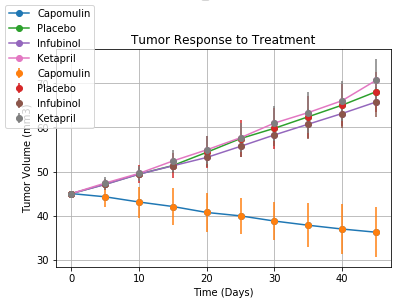

In [5]:
lines = [ series["Capomulin"],series["Placebo"],series["Infubinol"]]
labels = ["1","2","3","4"]

fig, ax = plt.subplots()

x_axis = np.arange(0,50,5)
a = ax.plot( x_axis, series["Capomulin"], linestyle='-', marker='o')
ax.errorbar(x_axis, series["Capomulin"], se_series["Capomulin"], fmt="o")
b = ax.plot( x_axis, series["Placebo"], linestyle='-', marker='o')
ax.errorbar(x_axis, series["Placebo"], se_series["Placebo"], fmt="o")
c = ax.plot( x_axis, series["Infubinol"], linestyle='-', marker='o')
ax.errorbar(x_axis, series["Infubinol"], se_series["Infubinol"], fmt="o")
d = ax.plot( x_axis, series["Ketapril"], linestyle='-', marker='o')
ax.errorbar(x_axis, series["Ketapril"], se_series["Ketapril"], fmt="o")
plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.savefig("tumor_response.png")


lines=[a,b,c,d]
plt.figlegend( lines, labels, loc = (0.5, 1), ncol=3 )

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')


plt.show()

In [6]:
#len(cap)
#len(cap_se)
#fig, ax = plt.subplots()
x_axis = np.arange(0,0,1)
#cap.plot()
#placebo.plot()
#ax.errorbar(x_axis, cap , cap_se, fmt="^")
#ax.errorbar(x_axis,placebo,plac_se, fmt="o")

In [7]:
metsite_df = data_df.groupby(['Drug','Timepoint'])
metsite_df = metsite_df.mean()
metsite_df.head()
metsite_df = pd.DataFrame(data = metsite_df)
metsite_df.head()
metsite_df = metsite_df.drop(labels = "Tumor Volume (mm3)", axis = 1)
metsite_df.head()
met_series = pd.pivot_table(metsite_df, values="Metastatic Sites", index="Timepoint", columns="Drug")
met_series.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
met_se_df = data_df.groupby(['Drug','Timepoint'])
met_se_df = met_se_df.std()
met_se_df = met_se_df.drop(labels = "Tumor Volume (mm3)", axis = 1)
met_se_df.head()
met_se_series = pd.pivot_table(met_se_df, values="Metastatic Sites", index="Timepoint", columns="Drug")
met_se_series.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.374166,0.497613,0.458258,0.470472,0.448978,0.494535,0.476095,0.331662,0.435890,0.380693
10,0.627163,0.680557,0.730297,0.666125,0.749603,0.564660,0.506870,0.442326,0.593109,0.511766
15,0.646899,0.787327,0.889087,0.834210,0.727029,0.850696,0.562296,0.564660,0.735868,0.511766
20,0.775107,1.022620,1.050063,1.031662,0.812728,1.020263,0.707107,0.572768,0.920662,0.685994


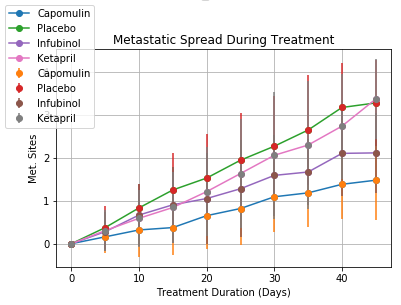

In [9]:
# plot
lines = [ met_series["Capomulin"],met_series["Placebo"],met_series["Infubinol"]]
labels = ["1","2","3","4"]

fig, ax = plt.subplots()

x_axis = np.arange(0,50,5)
a = ax.plot( x_axis, met_series["Capomulin"], linestyle='-', marker='o')
ax.errorbar(x_axis, met_series["Capomulin"], met_se_series["Capomulin"], fmt="o")
b = ax.plot( x_axis, met_series["Placebo"], linestyle='-', marker='o')
ax.errorbar(x_axis, met_series["Placebo"], met_se_series["Placebo"], fmt="o")
c = ax.plot( x_axis, met_series["Infubinol"], linestyle='-', marker='o')
ax.errorbar(x_axis, met_series["Infubinol"], met_se_series["Infubinol"], fmt="o")
d = ax.plot( x_axis, met_series["Ketapril"], linestyle='-', marker='o')
ax.errorbar(x_axis, met_series["Ketapril"], met_se_series["Ketapril"], fmt="o")
plt.grid()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.savefig("metastatic_spread.png")


lines=[a,b,c,d]
plt.figlegend( lines, labels, loc = (0.5, 1), ncol=3 )

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')


plt.show()


In [10]:
#Survival Rates
survive_df = data_df.groupby(['Drug','Timepoint'])
labels = ["Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug"]
survive_df = survive_df.nunique()

#survive_df = survive_df.drop(labels = labels)
survive_df=survive_df.drop(survive_df.columns[[1, 2, 3,4]], axis=1)
survive_df.head()
#

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [11]:
survive_series = pd.pivot_table(survive_df, values="Mouse ID", index="Timepoint", columns="Drug")

pic = survive_series[["Infubinol","Capomulin","Ketapril","Placebo"]]

survive_series = (survive_series/25)*100
#survive_series.plot()
#plt.grid()
#plt.xlabel("Time (Days)")
#plt.ylabel("Survival Rate (%)")
#plt.title("Survival During Treatment")
#plt.savefig("survival.png")
pic


Drug,Infubinol,Capomulin,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,21,25,22,24
15,21,24,19,20
20,20,23,19,19
25,18,22,19,17
30,17,22,18,15
35,12,22,17,14
40,10,21,15,12


In [12]:
#pic.plot()
#plt.xlabel("Time (Days)")
#plt.ylabel("Survival Rate (%)")
#plt.title("Survival During Treatment")
#plt.savefig("survival.png")


In [13]:
len(pic)
x_axis = np.arange(0,50,5)

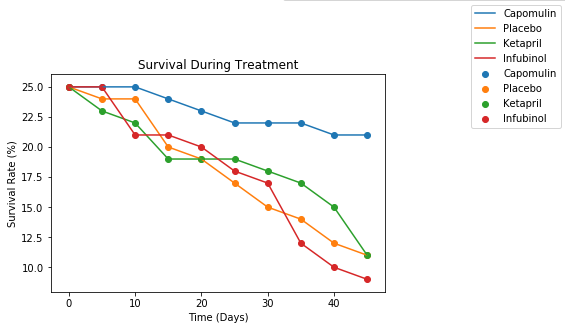

In [14]:
fig, ax = plt.subplots()
capomulin = pic["Capomulin"]
placebo = pic["Placebo"]
ketapril = pic["Ketapril"]
infubinol = pic["Infubinol"]

a =plt.scatter(x_axis,pic["Capomulin"])
plt.plot(x_axis,pic["Capomulin"])
b =plt.scatter(x_axis,pic["Placebo"])
plt.plot(x_axis,pic["Placebo"])
c = plt.scatter(x_axis,pic["Ketapril"])
plt.plot(x_axis,pic["Ketapril"])
d = plt.scatter(x_axis,pic["Infubinol"])
plt.plot(x_axis,pic["Infubinol"])
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.savefig("survival.png")



lines=[a,b,c,d]
plt.figlegend( lines, labels, loc = (0.5, 1), ncol=3 )

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower middle')



In [15]:
capomulin_percent = 100*((capomulin_percent[45]-capomulin_percent[0] )/(capomulin_percent[0]))
infubinol_percent = 100*((infubinol_percent[45] - infubinol_percent[0])/(infubinol_percent[0]))
placebo_percent = 100*((placebo_percent[45] - placebo_percent[0])/(placebo_percent[0]))
ketapril_percent = 100*((ketapril_percent[45] - ketapril_percent[0])/(ketapril_percent[0]))

ceftamin_percent = 100*((ceftamin_percent[45]-ceftamin_percent[0] )/(ceftamin_percent[0]))
naftisol_percent = 100*((naftisol_percent[45]-naftisol_percent[0] )/(naftisol_percent[0])) 
propriva_percent = 100*((propriva_percent[45]-propriva_percent[0] )/(propriva_percent[0]))     
ramicane_percent = 100*((ramicane_percent[45]-ramicane_percent[0] )/(ramicane_percent[0]))       
stelasyn_percent = 100*((stelasyn_percent[45]-stelasyn_percent[0] )/(stelasyn_percent[0])) 
zoniferol_percent = 100*((zoniferol_percent[45]-zoniferol_percent[0] )/(zoniferol_percent[0])) 


In [16]:
data = [capomulin_percent,infubinol_percent,ketapril_percent,placebo_percent,ceftamin_percent,naftisol_percent,propriva_percent,ramicane_percent,stelasyn_percent,zoniferol_percent] 
index = ["1","2","3","4","5","6","7","8","9","10"]
s = pd.Series(data, index=index)

In [31]:
series_percent_info = s.apply(lambda x: round(x,6))
series_percent_info
df_series_percent = pd.DataFrame(series_percent_info)
percent1 = df_series_percent
percent1=pd.DataFrame(percent1)
df_series_percent = df_series_percent.transpose()

In [18]:
percent_tuple= tuple((series_percent_info[0],series_percent_info[1],series_percent_info[2],series_percent_info[3],series_percent_info[4],series_percent_info[5],series_percent_info[6],series_percent_info[7],series_percent_info[8],series_percent_info[9]))

In [19]:
slice = percent_tuple[0],percent_tuple[7]
percent_tuple
slice

(-19.475303, -22.3209)

In [20]:
from itertools import cycle, islice
num = len(data)
x_axis = np.arange(num)
my_colors = list(islice(cycle(['g', 'r', 'r', 'r', 'r','r','r','g','r','r']), None, num))
#data=pd.DataFrame(data=data)
#data

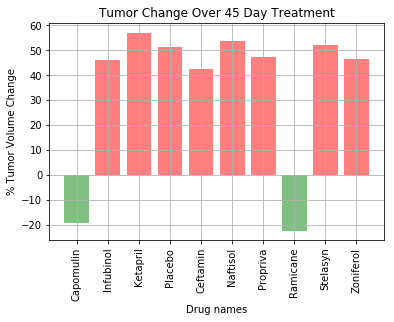

In [30]:
#fig, ax = plt.subplots()
#ax = data[0].value_counts().plot(kind='bar', figsize=(10,7),
                                        #color="coral", fontsize=13);
plt.bar(x_axis, data, color=my_colors, alpha=0.5, align="center")#,color=my_colors)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs1,rotation='vertical')
plt.xlabel("Drug names")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.savefig("tumor_change.png")

#plt.grid()
#plt.grid(color='black', linestyle='-', linewidth=1)
major_ticks = np.arange(0, 50, 10)
ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)


# Or if you want different settings for the grids:

plt.grid()

,0
1,-19.475303
2,46.123472
3,57.028795
4,51.297960
5,42.516492
6,53.923347
7,47.241175
8,-22.320900
9,52.085134
10,46.579751


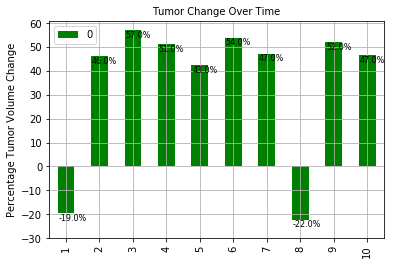

In [32]:
#ax = df_series_percent.plot(kind='bar', figsize=(10,7),color=my_colors, fontsize=13,)
 
ax = percent1.plot.bar(colors=my_colors)

ax.set_alpha(0.99)
ax.set_title("Tumor Change Over Time", fontsize=10)
ax.set_ylabel("Percentage Tumor Volume Change", fontsize=10)

ax.set_yticks(np.arange(-30,70,10))
#ax.set_xticks(tick_locations)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.02, i.get_height()-3, \
            str(round(i.get_height()))+'%', fontsize=8,
                color='black')

plt.grid()
y_axis=data

#sns.barplot(drugs1,y_axis,palette=my_colors)
percent1


,1,2,3,4,5,6,7,8,9,10
0,-19.475303,46.123472,57.028795,51.29796,42.516492,53.923347,47.241175,-22.3209,52.085134,46.579751
